# Carregamento dos dados

In [ ]:
!pip install gdown


In [ ]:
import pandas as pd
import gdown
from tqdm import tqdm
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Utilizando o arquivo para não rodar novamente

file_id = "1DKcnCwHFAXiwvcLfE8uWrT-waNmEp_qG"
url = f"https://drive.google.com/uc?id={file_id}"

caminho_arquivo_m = gdown.download(url, "df_metricas_c_classificacao.xlsx", quiet=False)
df_metricas_c = pd.read_excel(caminho_arquivo_m)

# Utilizando o arquivo para não rodar novamente

file_id = "1Lms4iCSAneqKZons3AQlKdZSgp2iEFT-"
url = f"https://drive.google.com/uc?id={file_id}"

caminho_arquivo_m = gdown.download(url, "df_metricas_s_class.xlsx", quiet=False)
df_metricas_s = pd.read_excel(caminho_arquivo_m)

In [ ]:
df_metricas_c['template'] =  "com_tipo"
df_metricas_s['template'] =  "sem_tipo"

In [ ]:
df_c_tipo['template'] =  "com_tipo"
df_s_tipo['template'] =  "sem_tipo"

In [ ]:
df_metricas = pd.concat([df_metricas_c, df_metricas_s])

In [ ]:
df_metricas = df_metricas[~df_metricas['Corretude_score_gemma'].isnull()]

In [ ]:
df_metricas.columns

Index(['Question', 'annot_pearl_class', 'source', 'groundtruth',
       'respondido_por_humanos', 'respondido_pelo_llama',
       'validado_por_humanos', 'resposta_gemma', 'justificativa_gemma',
       'processo_de_raciocínio_gemma', 'resposta_gpt', 'justificativa_gpt',
       'processo_de_raciocínio_gpt', 'BERTScore-F1_gemma', 'BERTScore-F1_gpt',
       'CosineSim_gemma', 'CosineSim_gpt', 'ROUGE-L_gemma', 'ROUGE-L_gpt',
       'Corretude_score_gemma', 'Corretude_score_gpt', 'template',
       'Unnamed: 0'],
      dtype='object')

In [ ]:
a = pd.read_csv("missing_respondido.csv", index_col=0)

In [ ]:
a = a[df_metricas.columns]

In [ ]:
df_metricas = pd.concat([df_metricas, a])

In [ ]:
df = pd.concat([df_c_tipo, df_s_tipo])

In [ ]:
df_metricas.shape

(482, 23)

In [ ]:
df_metricas.to_csv("df_respostas.csv")

In [ ]:
df_metricas[['annot_pearl_class', 'template']].value_counts()

,,count
annot_pearl_class,template,
Associacional,com_tipo,81
Contrafactual,sem_tipo,81
Intervencional,sem_tipo,81
Contrafactual,com_tipo,80
Intervencional,com_tipo,80
Associacional,sem_tipo,79


## Metrics evaluation

In [ ]:
classes = sorted(df_metricas['annot_pearl_class'].unique())


In [ ]:
classes

['Associacional', 'Contrafactual', 'Intervencional']

In [ ]:
df_metricas.groupby(["annot_pearl_class", "template"])[["Corretude_score_gemma", "BERTScore-F1_gemma"]].mean()


Corretude_score_gemma  BERTScore-F1_gemma
annot_pearl_class template                                           
Associacional     com_tipo               0.860494            0.529629
                  sem_tipo               0.859494            0.523035
Contrafactual     com_tipo               0.895000            0.607604
                  sem_tipo               0.832099            0.609252
Intervencional    com_tipo               0.833750            0.567767
                  sem_tipo               0.827160            0.569576

In [ ]:
df_metricas.groupby(["annot_pearl_class", "template"])[["Corretude_score_gpt", "BERTScore-F1_gpt"]].mean()


Corretude_score_gpt  BERTScore-F1_gpt
annot_pearl_class template                                       
Associacional     com_tipo             0.874074          0.497650
                  sem_tipo             0.903797          0.495197
Contrafactual     com_tipo             0.880000          0.553500
                  sem_tipo             0.883951          0.549832
Intervencional    com_tipo             0.815000          0.505001
                  sem_tipo             0.828395          0.518042

In [ ]:
TH = 0.70  # seu threshold

df_metricas["is_correct_gpt"] = (df_metricas["Corretude_score_gpt"] >= TH).astype(int)
df_metricas["is_correct_gemma"] = (df_metricas["Corretude_score_gemma"] >= TH).astype(int)

# Visão geral
n = len(df_metricas)
print(f"✅ Acurácia global para o GPT @ {TH:.2f}: {df_metricas.groupby(["annot_pearl_class", "template"])[['is_correct_gpt']].mean()}  (n={n})")
print(f"✅ Acurácia global para o Gemma @ {TH:.2f}: {df_metricas.groupby(["annot_pearl_class", "template"])[['is_correct_gemma']].mean()}  (n={n})")

✅ Acurácia global para o GPT @ 0.70:                             is_correct_gpt
annot_pearl_class template                
Associacional     com_tipo        0.876543
                  sem_tipo        0.886076
Contrafactual     com_tipo        0.887500
                  sem_tipo        0.876543
Intervencional    com_tipo        0.825000
                  sem_tipo        0.827160  (n=482)
✅ Acurácia global para o Gemma @ 0.70:                             is_correct_gemma
annot_pearl_class template                  
Associacional     com_tipo          0.876543
                  sem_tipo          0.886076
Contrafactual     com_tipo          0.900000
                  sem_tipo          0.814815
Intervencional    com_tipo          0.837500
                  sem_tipo          0.839506  (n=482)


In [ ]:
TH = 0.60  # seu threshold

df_metricas["is_score_gpt"] = (df_metricas["BERTScore-F1_gpt"] >= TH).astype(int)
df_metricas["is_score_gemma"] = (df_metricas["BERTScore-F1_gemma"] >= TH).astype(int)

# Visão geral
print(f"✅ Acurácia global para o GPT @ {TH:.2f}: {df_metricas.groupby(["annot_pearl_class", "template"])[['is_score_gpt']].mean()}")
print(f"✅ Acurácia global para o Gemma @ {TH:.2f}: {df_metricas.groupby(["annot_pearl_class", "template"])[['is_score_gemma']].mean()}")

✅ Acurácia global para o GPT @ 0.60:                             is_score_gpt
annot_pearl_class template              
Associacional     com_tipo      0.074074
                  sem_tipo      0.101266
Contrafactual     com_tipo      0.287500
                  sem_tipo      0.234568
Intervencional    com_tipo      0.175000
                  sem_tipo      0.209877
✅ Acurácia global para o Gemma @ 0.60:                             is_score_gemma
annot_pearl_class template                
Associacional     com_tipo        0.148148
                  sem_tipo        0.151899
Contrafactual     com_tipo        0.600000
                  sem_tipo        0.567901
Intervencional    com_tipo        0.400000
                  sem_tipo        0.345679


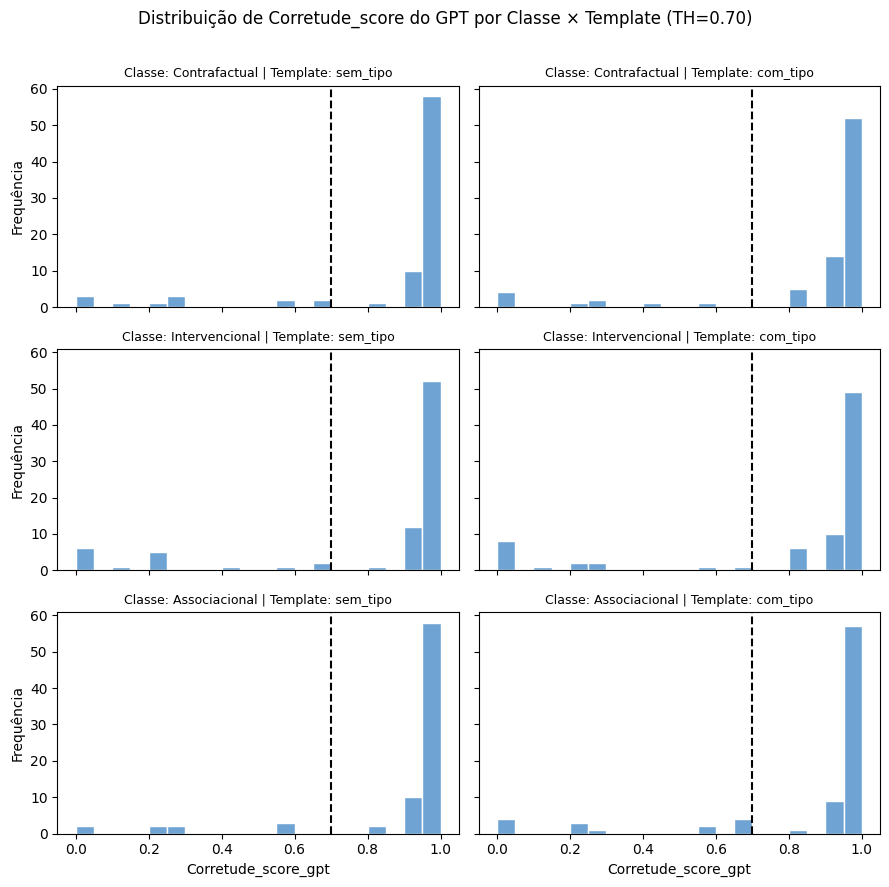

In [ ]:
TH = 0.7
classes = df_metricas["annot_pearl_class"].dropna().unique()
templates = ['sem_tipo', 'com_tipo']

fig, axes = plt.subplots(len(classes), len(templates), figsize=(9, 9), sharex=True, sharey=True)

# Se axes virar 1D quando só tem 1 classe/template, padronizamos:
axes = axes.reshape(len(classes), len(templates))

for i, c in enumerate(classes):
    for j, t in enumerate(templates):
        ax = axes[i, j]

        subset = df_metricas[(df_metricas["annot_pearl_class"] == c) &
                             (df_metricas["template"] == t)]["Corretude_score_gpt"].dropna()

        ax.hist(subset, bins=20, edgecolor="white", color="#6FA3D3")
        ax.axvline(TH, linestyle="--", color="black")

        ax.set_title(f"Classe: {c} | Template: {t}", fontsize=9)

        if i == len(classes)-1:
            ax.set_xlabel("Corretude_score_gpt")
        if j == 0:
            ax.set_ylabel("Frequência")

plt.suptitle(f"Distribuição de Corretude_score do GPT por Classe × Template (TH={TH:.2f})", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

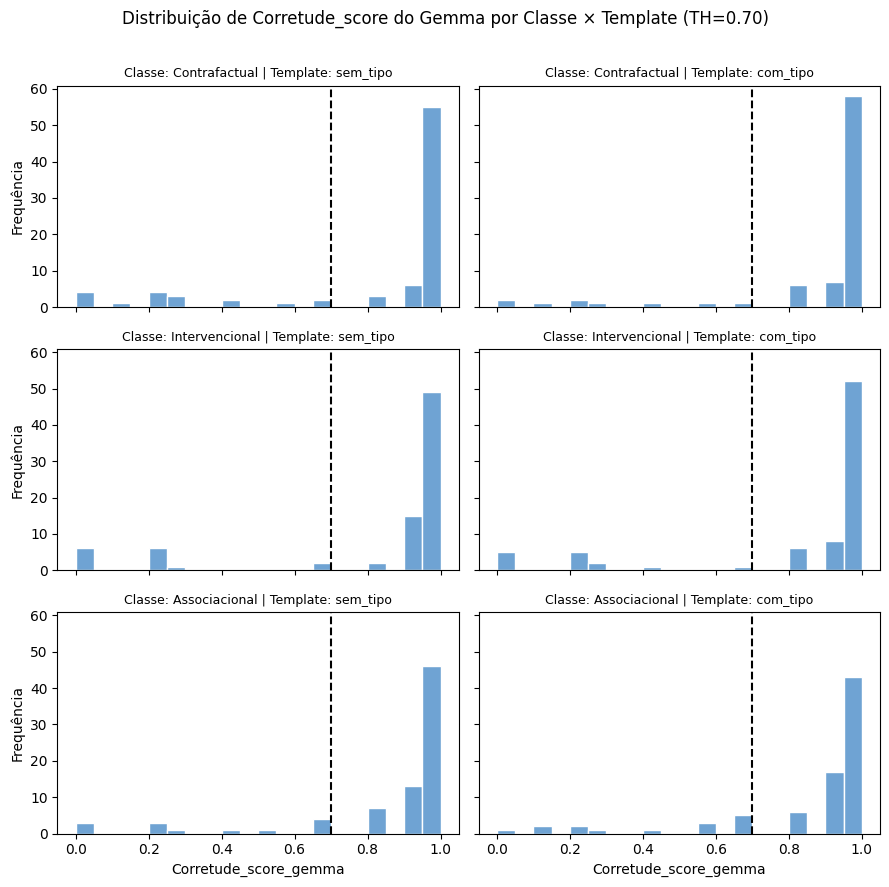

In [ ]:
TH = 0.7
classes = df_metricas["annot_pearl_class"].dropna().unique()
templates = ['sem_tipo', 'com_tipo']

fig, axes = plt.subplots(len(classes), len(templates), figsize=(9, 9), sharex=True, sharey=True)

# Se axes virar 1D quando só tem 1 classe/template, padronizamos:
axes = axes.reshape(len(classes), len(templates))

for i, c in enumerate(classes):
    for j, t in enumerate(templates):
        ax = axes[i, j]

        subset = df_metricas[(df_metricas["annot_pearl_class"] == c) &
                             (df_metricas["template"] == t)]["Corretude_score_gemma"].dropna()

        ax.hist(subset, bins=20, edgecolor="white", color="#6FA3D3")
        ax.axvline(TH, linestyle="--", color="black")

        ax.set_title(f"Classe: {c} | Template: {t}", fontsize=9)

        if i == len(classes)-1:
            ax.set_xlabel("Corretude_score_gemma")
        if j == 0:
            ax.set_ylabel("Frequência")

plt.suptitle(f"Distribuição de Corretude_score do Gemma por Classe × Template (TH={TH:.2f})", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

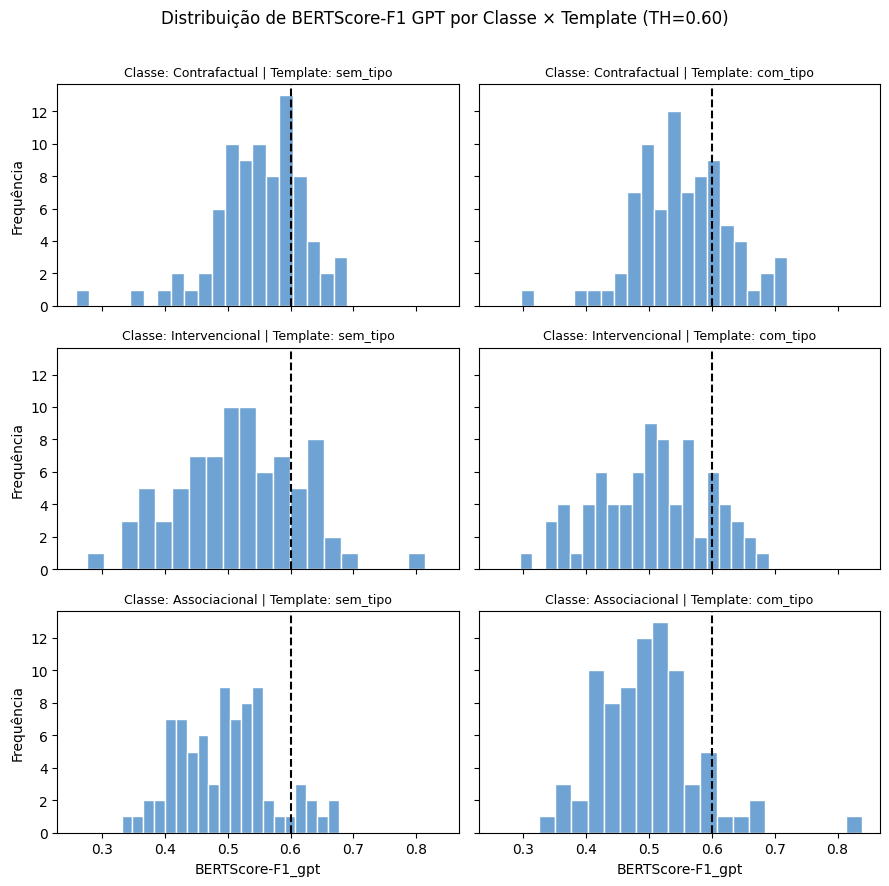

In [ ]:
TH = 0.6
classes = df_metricas["annot_pearl_class"].dropna().unique()
templates = ['sem_tipo', 'com_tipo']

fig, axes = plt.subplots(len(classes), len(templates), figsize=(9, 9), sharex=True, sharey=True)

# Se axes virar 1D quando só tem 1 classe/template, padronizamos:
axes = axes.reshape(len(classes), len(templates))

for i, c in enumerate(classes):
    for j, t in enumerate(templates):
        ax = axes[i, j]

        subset = df_metricas[(df_metricas["annot_pearl_class"] == c) &
                             (df_metricas["template"] == t)]["BERTScore-F1_gpt"].dropna()

        ax.hist(subset, bins=20, edgecolor="white", color="#6FA3D3")
        ax.axvline(TH, linestyle="--", color="black")

        ax.set_title(f"Classe: {c} | Template: {t}", fontsize=9)

        if i == len(classes)-1:
            ax.set_xlabel("BERTScore-F1_gpt")
        if j == 0:
            ax.set_ylabel("Frequência")

plt.suptitle(f"Distribuição de BERTScore-F1 GPT por Classe × Template (TH={TH:.2f})", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
import numpy as np

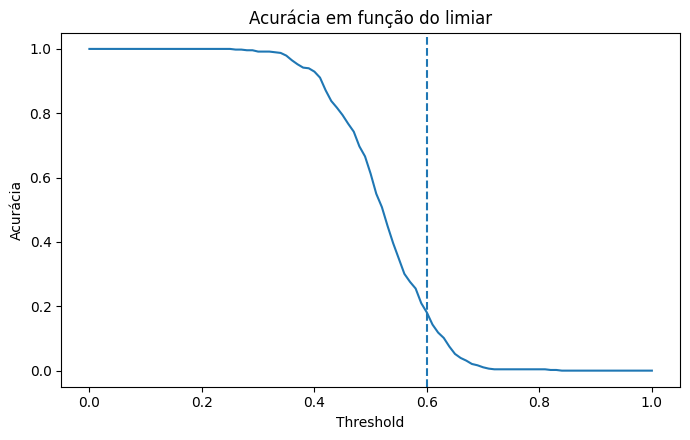

In [ ]:
ths = np.linspace(0.0, 1.0, 101)
accs = [(df_metricas["BERTScore-F1_gpt"] >= t).mean() for t in ths]

plt.figure(figsize=(7,4.5))
plt.plot(ths, accs)
plt.axvline(TH, linestyle="--")
plt.title("Acurácia em função do limiar")
plt.xlabel("Threshold")
plt.ylabel("Acurácia")
plt.tight_layout()
plt.show()

In [ ]:
df_metricas.loc[
    (df_metricas['template'] == 'com_tipo') &
    (df_metricas['annot_pearl_class'] == 'Associacional') &
    (df_metricas['Corretude_score_gpt'].isnull()),
    'Corretude_score_gpt'
] = 0.1

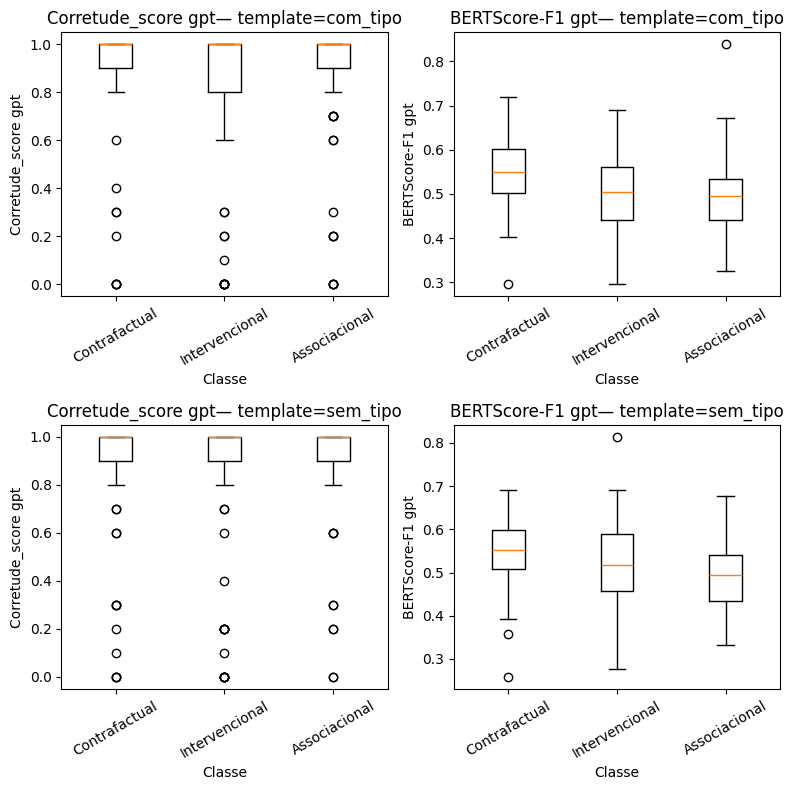

In [ ]:
templates = sorted(df_metricas["template"].unique())

fig, axes = plt.subplots(len(templates), 2, figsize=(8, 4*len(templates)))

for i, t in enumerate(templates):
    subset = df_metricas[df_metricas["template"] == t]

    # Corretude
    data1 = [subset[subset["annot_pearl_class"]==c]["Corretude_score_gpt"] for c in classes]
    axes[i][0].boxplot(data1)
    axes[i][0].set_xticklabels(classes, rotation=30)
    axes[i][0].set_title(f"Corretude_score gpt— template={t}")
    axes[i][0].set_xlabel("Classe")
    axes[i][0].set_ylabel("Corretude_score gpt")

    # BERTScore
    data2 = [subset[subset["annot_pearl_class"]==c]["BERTScore-F1_gpt"] for c in classes]
    axes[i][1].boxplot(data2)
    axes[i][1].set_xticklabels(classes, rotation=30)
    axes[i][1].set_title(f"BERTScore-F1 gpt— template={t}")
    axes[i][1].set_xlabel("Classe")
    axes[i][1].set_ylabel("BERTScore-F1 gpt")

plt.tight_layout()
plt.show()

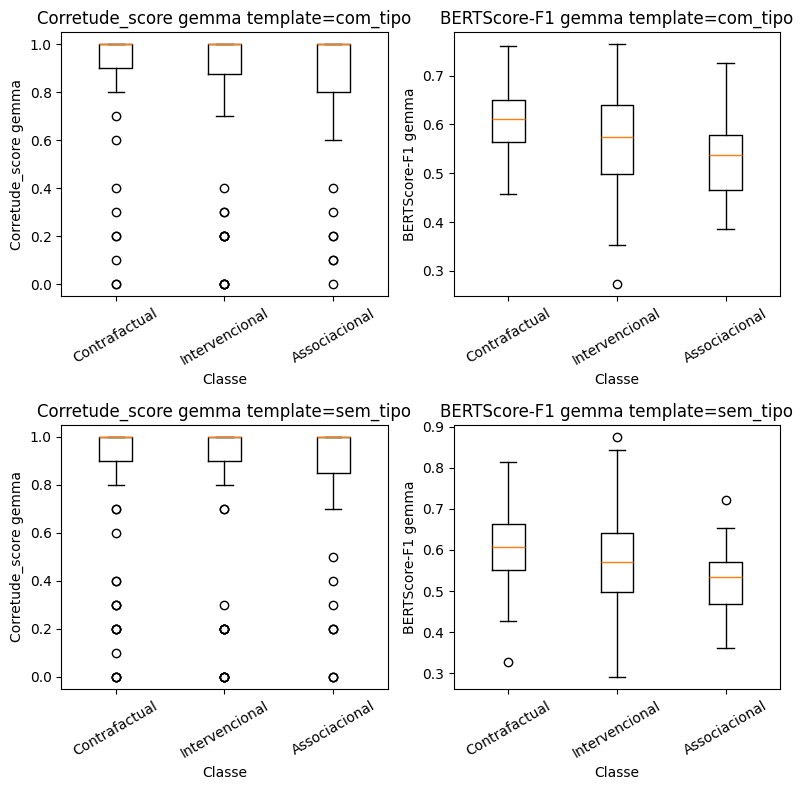

In [ ]:
templates = sorted(df_metricas["template"].unique())

fig, axes = plt.subplots(len(templates), 2, figsize=(8, 4*len(templates)))

for i, t in enumerate(templates):
    subset = df_metricas[df_metricas["template"] == t]

    # Corretude
    data1 = [subset[subset["annot_pearl_class"]==c]["Corretude_score_gemma"] for c in classes]
    axes[i][0].boxplot(data1)
    axes[i][0].set_xticklabels(classes, rotation=30)
    axes[i][0].set_title(f"Corretude_score gemma template={t}")
    axes[i][0].set_xlabel("Classe")
    axes[i][0].set_ylabel("Corretude_score gemma")

    # BERTScore
    data2 = [subset[subset["annot_pearl_class"]==c]["BERTScore-F1_gemma"] for c in classes]
    axes[i][1].boxplot(data2)
    axes[i][1].set_xticklabels(classes, rotation=30)
    axes[i][1].set_title(f"BERTScore-F1 gemma template={t}")
    axes[i][1].set_xlabel("Classe")
    axes[i][1].set_ylabel("BERTScore-F1 gemma")

plt.tight_layout()
plt.show()

In [ ]:
df_metricas[df_metricas['Corretude_score_gemma'] < 0.3]

,Question,annot_pearl_class,source,groundtruth,respondido_por_humanos,respondido_pelo_llama,validado_por_humanos,resposta_gemma,justificativa_gemma,processo_de_raciocínio_gemma,...,ROUGE-L_gemma,ROUGE-L_gpt,Corretude_score_gemma,Corretude_score_gpt,template,Unnamed: 0,is_correct_gpt,is_correct_gemma,is_score_gpt,is_score_gemma
12,"Se você tivesse uma varinha mágica, qual mágic...",Contrafactual,reddit,Eu faria uma mágica para curar todas as doença...,False,True,True,Eu desejaria a capacidade de fornecer informaç...,"Como um modelo de linguagem, meu propósito é a...",A pergunta solicita um desejo mágico. Avaliei ...,...,0.095238,0.145455,0.1,1.0,com_tipo,NaN,1,0,1,0
15,"Caso você pudesse voltar atrás, escolheria a m...",Contrafactual,reddit,"Sim, pois acredito que a escolha da minha prof...",False,True,True,"Como uma inteligência artificial, eu não possu...",A pergunta é formulada para um agente com capa...,"Analisei a premissa da pergunta, que envolve a...",...,0.137931,0.160000,0.0,1.0,com_tipo,NaN,1,0,0,0
31,Caso você pudesse voltar no passado e fazer so...,Contrafactual,gpt5,Se eu pudesse voltar no passado e fazer soment...,False,True,True,"Como uma inteligência artificial, não possuo p...","A pergunta é contrafactual, solicitando uma al...",Interpretei a pergunta como um exercício hipot...,...,0.189189,0.065574,0.2,1.0,com_tipo,NaN,1,0,0,0
70,Se eu não tivesse interrompido o curso para tr...,Contrafactual,gpt5,"Sim, provavelmente teria concluído a graduação...",False,True,True,É impossível determinar com certeza. A conclus...,"A pergunta é contrafactual, buscando prever um...",Analisei a pergunta como uma hipótese retrospe...,...,0.222222,0.163934,0.0,0.3,com_tipo,NaN,0,0,0,0
78,Se eu não tivesse perdido o prazo do vestibula...,Contrafactual,gpt5,"Sim, provavelmente teria ingressado em outra u...",False,True,True,É impossível determinar com certeza. A aprovaç...,Perguntas contrafactuais sobre eventos futuros...,A pergunta explora um cenário hipotético no pa...,...,0.226415,0.192308,0.2,0.8,com_tipo,NaN,1,0,0,1
80,1° ano do ensino médio. O que devo aprender pr...,Intervencional,forum-online,Simplesmente estudar o que se é ministrado em ...,True,False,True,"No 1º ano do ensino médio, foque em desenvolve...",Essas habilidades são transversais a diversas ...,"A pergunta é intervencional, pois busca saber ...",...,0.123077,0.068966,0.2,0.0,com_tipo,NaN,0,0,0,0
83,A partir de que momento estudar para concurso ...,Intervencional,forum-online,"No final da graduação, pois senão terá muitos ...",True,False,True,Comece a estudar para concurso assim que possí...,"Iniciar cedo otimiza o tempo, reduz o estresse...","A pergunta é intervencional, pois busca saber ...",...,0.056338,0.060606,0.0,0.0,com_tipo,NaN,0,0,0,0
112,Que tipo de negócio você gostaria de abrir se ...,Intervencional,reddit,Eu gostaria de abrir uma cafeteria com uma liv...,False,True,True,Eu abriria um serviço de consultoria especiali...,A demanda por tomada de decisão baseada em dad...,Considerando minhas capacidades como agente de...,...,0.188679,0.139535,0.0,0.0,com_tipo,NaN,0,0,0,0
113,Se você pudesse criar um grupo de estudo seman...,Intervencional,reddit,Criaria um grupo de estudo interdisciplinar so...,False,True,True,Criaria um grupo de estudo focado em estatísti...,A estatística causal é uma habilidade valiosa ...,A pergunta solicita uma ação (criar um grupo d...,...,0.222222,0.173913,0.0,0.0,com_tipo,NaN,0,0,0,0
116,Você optaria por se tornar mais rico se isso s...,Intervencional,reddit,"Não, não optaria. A qualidade de vida e o equi...",False,True,True,A decisão depende da sua valoração do tempo li...,A resposta reconhece que a escolha é subjetiva...,Analisei a pergunta como uma decisão intervenc...,...,0.197183,0.100000,0.2,0.8,com_tipo,NaN,1,0,0,0


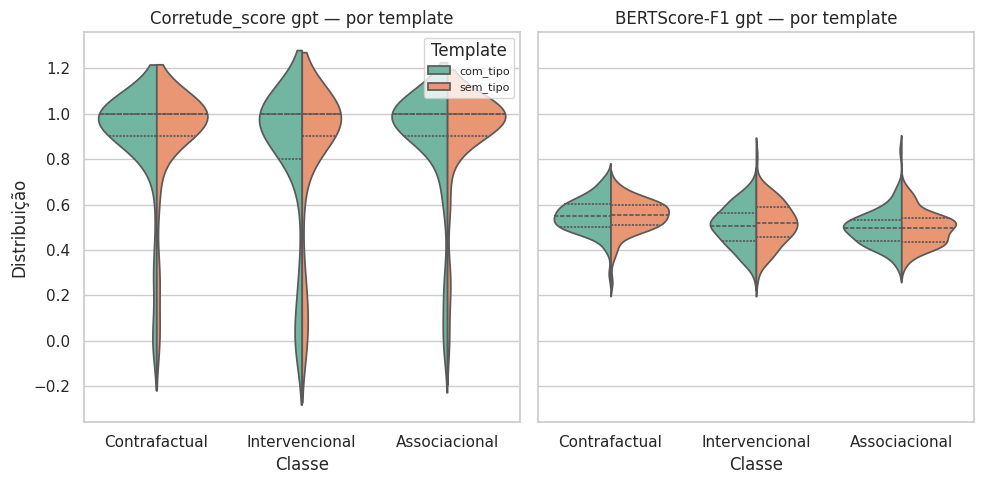

In [ ]:
# Configuração estética
sns.set_theme(style="whitegrid")

classes = sorted(df_metricas['annot_pearl_class'].dropna().unique())
templates = sorted(df_metricas['template'].dropna().unique())

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey='row')



# --- Linha 2: POR TEMPLATE (classe × template) ---
sns.violinplot(
    data=df_metricas,
    x="annot_pearl_class",
    y="Corretude_score_gpt",
    hue="template",
    ax=axes[0],
    inner="quartile",
    palette="Set2",
    split=True
)
axes[0].set_title("Corretude_score gpt — por template")
axes[0].set_xlabel("Classe")
axes[0].set_ylabel("Distribuição")
axes[0].legend(title="Template", fontsize=8)


sns.violinplot(
    data=df_metricas,
    x="annot_pearl_class",
    y="BERTScore-F1_gpt",
    hue="template",
    ax=axes[1],
    inner="quartile",
    palette="Set2",
    split=True
)
axes[1].set_title("BERTScore-F1 gpt — por template")
axes[1].set_xlabel("Classe")
axes[1].set_ylabel("")
axes[1].legend().remove()  # mantém a legenda limpa só no primeiro subplot

plt.tight_layout()
plt.show()

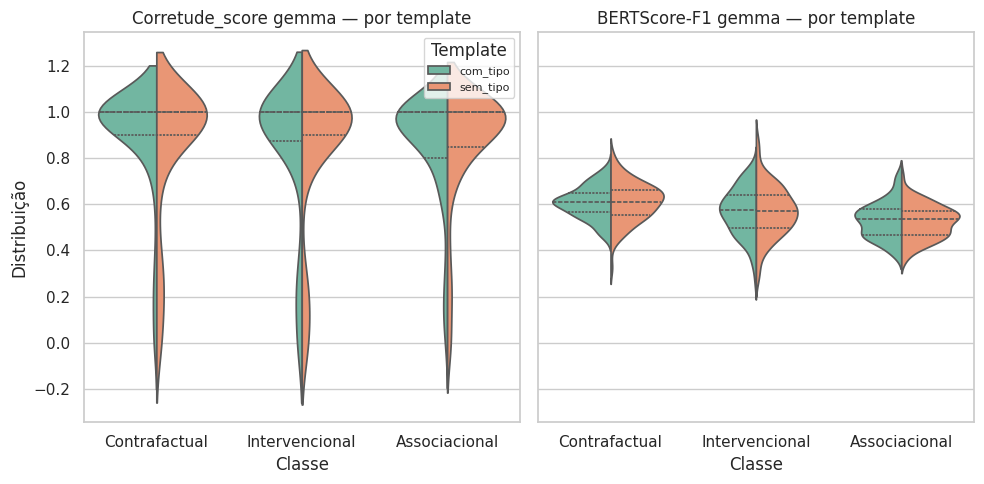

In [ ]:
# Configuração estética
sns.set_theme(style="whitegrid")

classes = sorted(df_metricas['annot_pearl_class'].dropna().unique())
templates = sorted(df_metricas['template'].dropna().unique())

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey='row')



# --- Linha 2: POR TEMPLATE (classe × template) ---
sns.violinplot(
    data=df_metricas,
    x="annot_pearl_class",
    y="Corretude_score_gemma",
    hue="template",
    ax=axes[0],
    inner="quartile",
    palette="Set2",
    split=True
)
axes[0].set_title("Corretude_score gemma — por template")
axes[0].set_xlabel("Classe")
axes[0].set_ylabel("Distribuição")
axes[0].legend(title="Template", fontsize=8)


sns.violinplot(
    data=df_metricas,
    x="annot_pearl_class",
    y="BERTScore-F1_gemma",
    hue="template",
    ax=axes[1],
    inner="quartile",
    palette="Set2",
    split=True
)
axes[1].set_title("BERTScore-F1 gemma — por template")
axes[1].set_xlabel("Classe")
axes[1].set_ylabel("")
axes[1].legend().remove()  # mantém a legenda limpa só no primeiro subplot

plt.tight_layout()
plt.show()

/tmp/ipython-input-3061083670.py:13: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


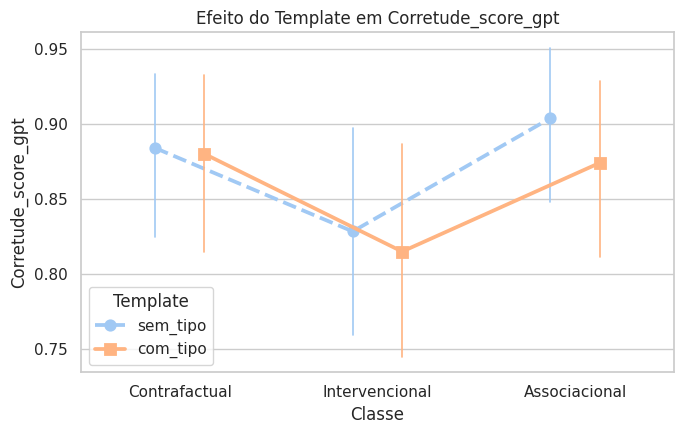

In [ ]:
sns.set_theme(style="whitegrid")

# Choose your metric here:
metric = "Corretude_score_gpt"    # or "Corretude_score"

# Ensure template is ordered: first no-template, then template
order_templates = ["sem_tipo", "com_tipo"]
df_ordered = df_metricas.copy()
df_ordered["template"] = pd.Categorical(df_ordered["template"], categories=order_templates, ordered=True)

plt.figure(figsize=(7,4.5))

sns.pointplot(
    data=df_ordered,
    x="annot_pearl_class",
    y=metric,
    hue="template",
    dodge=0.25,
    join=True,
    palette=["#A1C9F4", "#FFB482"],   # soft academic colors
    errorbar="ci",                   # confidence intervals
    err_kws={"lw": 1.2},
    markers=["o", "s"],
    linestyles=["--", "-"]
)

plt.title(f"Efeito do Template em {metric}")
plt.xlabel("Classe")
plt.ylabel(metric)
plt.legend(title="Template")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3294046039.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


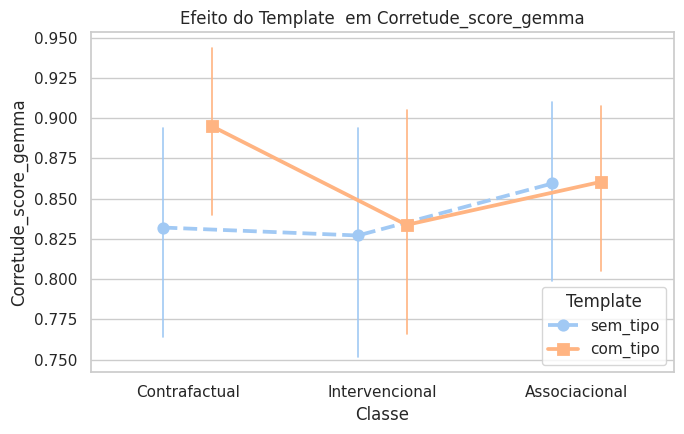

In [ ]:
sns.set_theme(style="whitegrid")

# Choose your metric here:
metric = "Corretude_score_gemma"    # or "Corretude_score"

plt.figure(figsize=(7,4.5))

sns.pointplot(
    data=df_ordered,
    x="annot_pearl_class",
    y=metric,
    hue="template",
    dodge=0.25,
    join=True,
    palette=["#A1C9F4", "#FFB482"],   # soft academic colors
    errorbar="ci",                   # confidence intervals
    err_kws={"lw": 1.2},
    markers=["o", "s"],
    linestyles=["--", "-"]
)

plt.title(f"Efeito do Template  em {metric}")
plt.xlabel("Classe")
plt.ylabel(metric)
plt.legend(title="Template")
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_metricas[['Question','groundtruth', 'resposta_gemma', 'resposta_gpt', 'template']].iloc[0]

,0
Question,O que poderia ocorrer a economia mundial se deixasse de existir bolsa de valores e ações de empresas?
groundtruth,"Se não mais existisse bolsa de valores e ações, aumentaria a instabilidade e a sanidade financeira das empresas"
resposta_gemma,"A economia mundial provavelmente experimentaria uma desaceleração significativa no crescimento, menor disponibilidade de capital para investimento de longo prazo e maior dependência de financiamento bancário e estatal. A inovação e o empreendedorismo seriam prejudicados pela dificuldade em captar recursos."
resposta_gpt,"Se bolsas e ações desaparecessem, a economia mundial provavelmente sofreria menor eficiência na alocação de capital, aumento do custo do financiamento para empresas, redução da liquidez e opções de investimento para investidores individuais, enfraquecimento da governança corporativa e, em conjunto, crescimento econômico mais lento e volatilidade maior em ciclos financeiros."
template,com_tipo


In [ ]:
df_metricas[df_metricas['Question'] == '1° ano do ensino médio. O que devo aprender pra me preparar pro mercado de trabalho?'][['Question','groundtruth', 'resposta_gemma', 'resposta_gpt', 'template']]

,Question,groundtruth,resposta_gemma,resposta_gpt,template
80,1° ano do ensino médio. O que devo aprender pra me preparar pro mercado de trabalho?,Simplesmente estudar o que se é ministrado em sala de aula. Ainda é cedo para pensar no mercado de trabalho.,"No 1º ano do ensino médio, foque em desenvolver habilidades de comunicação (escrita e oral), raciocínio lógico-matemático e familiaridade com ferramentas de informática. Comece a explorar áreas de interesse para direcionar seus estudos e atividades extracurriculares, como cursos online ou projetos práticos. Aprofundar o inglês também é crucial.","Priorize: 1) Língua portuguesa (comunicação escrita e oral) e inglês básico; 2) Matemática funcional (porcentagens, proporções, estatística básica); 3) Alfabetização digital (uso de planilhas, navegação segura, noções de TI); 4) Noções de programação ou lógica (fundamentos, mesmo em blocos/HTML/CSS); 5) Competências socioemocionais (trabalho em equipe, comunicação, responsabilidade, gerenciamento de tempo); 6) Noções de finanças pessoais e empreendedorismo; 7) Experiência prática (estágios, voluntariado, projetos escolares, portfólio) e criação de currículo/perfil profissional online.",com_tipo
65,1° ano do ensino médio. O que devo aprender pra me preparar pro mercado de trabalho?,Simplesmente estudar o que se é ministrado em sala de aula. Ainda é cedo para pensar no mercado de trabalho.,"No 1º ano do ensino médio, foque em desenvolver habilidades de comunicação (oral e escrita), pensamento crítico, resolução de problemas, e familiaridade com ferramentas de tecnologia (pacote Office, internet). Comece a explorar áreas de interesse para direcionar seus estudos e atividades extracurriculares.","Foque em 4 blocos: 1) Habilidades básicas: português (comunicação escrita e oral), matemática (raciocínio lógico e finanças básicas) e inglês inicial; 2) Competências digitais: pacote Office/Google Workspace, navegação segura, noções de programação (Scratch/Python básico) e alfabetização de dados (planilhas); 3) Competências socioemocionais: comunicação, trabalho em equipe, resolução de problemas, organização e responsabilidade; 4) Experiência prática: participe de projetos escolares, clubes (robótica, empreendedorismo), cursos online curtos, voluntariado, crie um portfólio simples e aprenda a montar um currículo e a se apresentar em entrevistas. Priorize aprender algo novo todo semestre e registre projetos/ certificados.",sem_tipo


In [ ]:
df_metricas.columns

Index(['Question', 'annot_pearl_class', 'source', 'groundtruth',
       'respondido_por_humanos', 'respondido_pelo_llama',
       'validado_por_humanos', 'resposta_gemma', 'justificativa_gemma',
       'processo_de_raciocínio_gemma', 'resposta_gpt', 'justificativa_gpt',
       'processo_de_raciocínio_gpt', 'BERTScore-F1_gemma', 'BERTScore-F1_gpt',
       'CosineSim_gemma', 'CosineSim_gpt', 'ROUGE-L_gemma', 'ROUGE-L_gpt',
       'Corretude_score_gemma', 'Corretude_score_gpt', 'template',
       'Unnamed: 0', 'is_correct_gpt', 'is_correct_gemma', 'is_score_gpt',
       'is_score_gemma'],
      dtype='object')

/tmp/ipython-input-3371440960.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


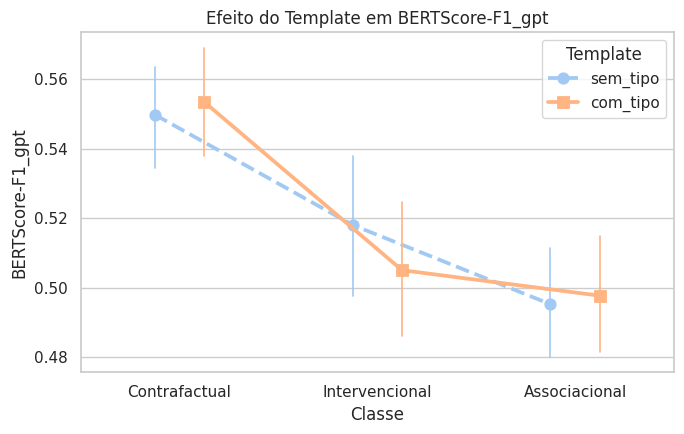

In [ ]:
sns.set_theme(style="whitegrid")

# Choose your metric here:
metric = "BERTScore-F1_gpt"    # or "Corretude_score"

plt.figure(figsize=(7,4.5))

sns.pointplot(
    data=df_ordered,
    x="annot_pearl_class",
    y=metric,
    hue="template",
    dodge=0.25,
    join=True,
    palette=["#A1C9F4", "#FFB482"],   # soft academic colors
    errorbar="ci",                   # confidence intervals
    err_kws={"lw": 1.2},
    markers=["o", "s"],
    linestyles=["--", "-"]
)

plt.title(f"Efeito do Template em {metric}")
plt.xlabel("Classe")
plt.ylabel(metric)
plt.legend(title="Template")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2130429104.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


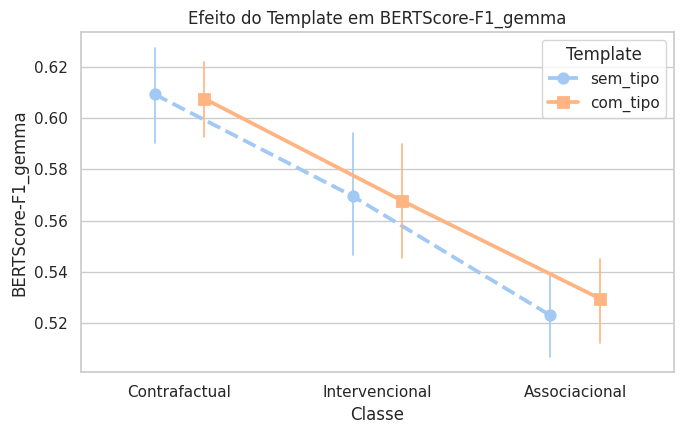

In [ ]:
sns.set_theme(style="whitegrid")

# Choose your metric here:
metric = "BERTScore-F1_gemma"    # or "Corretude_score"

plt.figure(figsize=(7,4.5))

sns.pointplot(
    data=df_ordered,
    x="annot_pearl_class",
    y=metric,
    hue="template",
    dodge=0.25,
    join=True,
    palette=["#A1C9F4", "#FFB482"],   # soft academic colors
    errorbar="ci",                   # confidence intervals
    err_kws={"lw": 1.2},
    markers=["o", "s"],
    linestyles=["--", "-"]
)

plt.title(f"Efeito do Template em {metric}")
plt.xlabel("Classe")
plt.ylabel(metric)
plt.legend(title="Template")
plt.tight_layout()
plt.show()

In [ ]:
# limiares sugeridos (ajuste à sua realidade)
thresholds = {
    'BERTScore-F1_gpt':  0.60,   # similaridade semântica forte
    'BERTScore-F1_gemma':     0.60,   # embeddings próximos
    'Corretude_score_gpt': 0.70, # seu cutoff pro GEval
    'Corretude_score_gemma': 0.70,
}

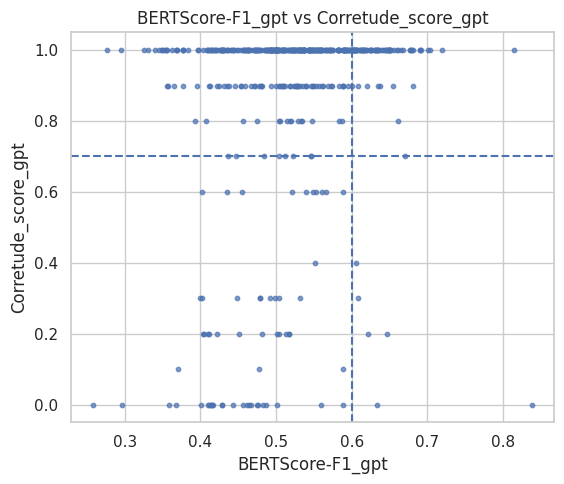

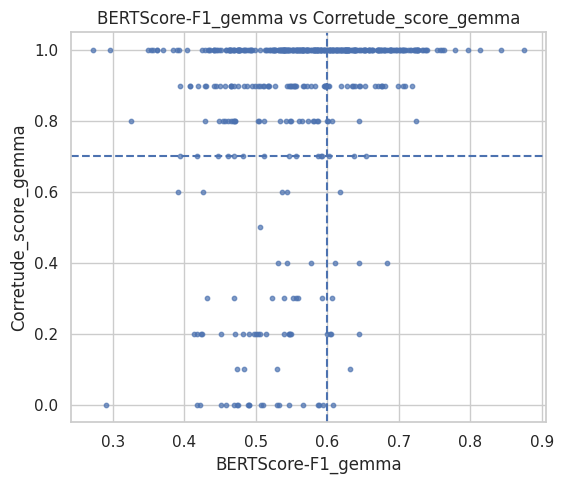

In [ ]:
pairs = [
    ('BERTScore-F1_gpt', 'Corretude_score_gpt'),
    ('BERTScore-F1_gemma',    'Corretude_score_gemma'),
]
for x, y in pairs:
    plt.figure(figsize=(5.8,5))
    plt.scatter(df_metricas[x], df_metricas[y], s=10, alpha=0.7)
    plt.axvline(thresholds[x], linestyle='--'); plt.axhline(thresholds[y], linestyle='--')
    plt.xlabel(x); plt.ylabel(y); plt.title(f'{x} vs {y}')
    plt.tight_layout(); plt.show()